## import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector
import warnings
warnings.filterwarnings("ignore")


## Connect MySQL Server

In [2]:
conn=mysql.connector.connect(
    host="localhost",
    user="root",
    password="Pawar@7542",
    database="classicmodels"
)
cur=conn.cursor()

## Analyze & Visualize Business Insights Using Univariate & Bivariate Charts On Classic Model Project

### Find total sales by year.



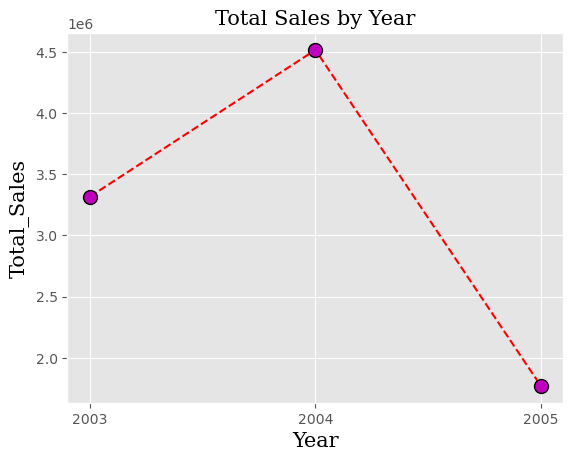

In [25]:
query="""select year(orderDate),sum(quantityOrdered * priceEach) as total_sales from orders o join orderdetails od on od.orderNumber=o.orderNumber group by year(orderDate)"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Year","Total_Sales"])

plt.style.use("ggplot")
plt.plot(df["Year"],df["Total_Sales"],"o--r",mfc="m",mec="k",ms=10)
font={"family":"serif","color":"k","size":15}
plt.title("Total Sales by Year",fontdict=font)
plt.xlabel("Year",fontdict=font)
plt.ylabel("Total_Sales",fontdict=font)
plt.xticks(df["Year"].astype("int"))
plt.show()

### Find top 10 customers by total purchase amount.

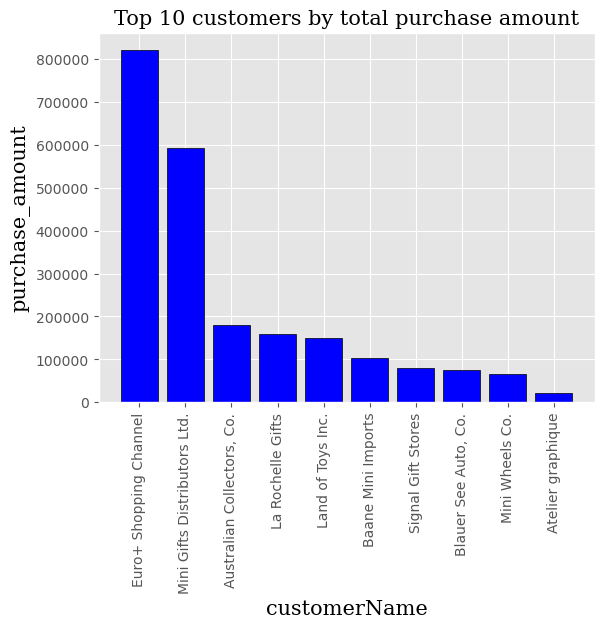

In [33]:
query="""select customerName,round(sum(quantityOrdered * priceEach),2) as purchase_amount from orderdetails od join orders o on o.orderNumber=od.orderNumber join customers c on c.customerNumber=o.customerNumber group by customerName limit 10;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["customerName","purchase_amount"]).sort_values("purchase_amount",ascending=False)

plt.style.use("ggplot")
plt.bar(df["customerName"],df["purchase_amount"],color="b",edgecolor="k")
font={"family":"serif","color":"k","size":15}
plt.title("Top 10 customers by total purchase amount",fontdict=font)
plt.xlabel("customerName",fontdict=font)
plt.ylabel("purchase_amount",fontdict=font)
plt.xticks(rotation=90)
plt.show()

### Find customer count by country.

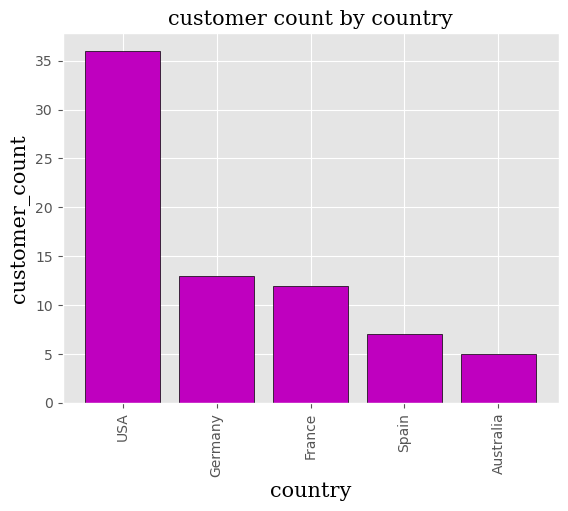

In [38]:
query="""select country,count(customerNumber) as customer_count from customers group by country
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["country","customer_count"]).sort_values("customer_count",ascending=False).head()

plt.style.use("ggplot")
plt.bar(df["country"],df["customer_count"],color="m",edgecolor="k")
font={"family":"serif","color":"k","size":15}
plt.title("customer count by country",fontdict=font)
plt.xlabel("country",fontdict=font)
plt.ylabel("customer_count",fontdict=font)
plt.xticks(rotation=90)
plt.show()

### Find customers with highest credit limit.

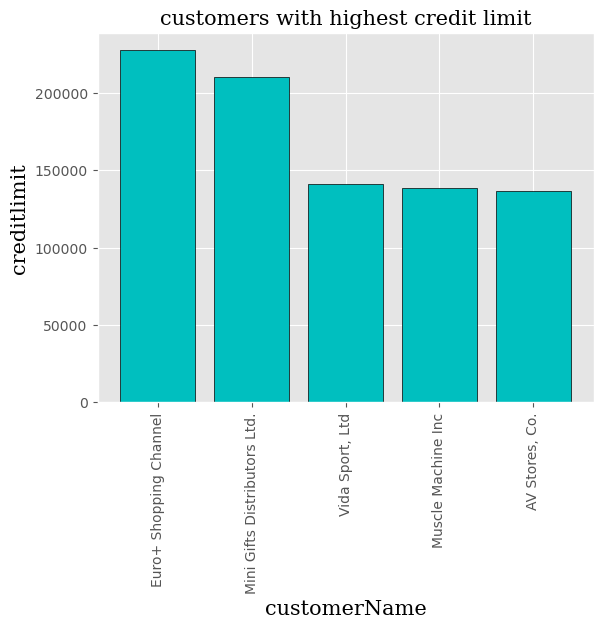

In [41]:
query="""select customerName,creditlimit from customers order by creditlimit desc
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["customerName","creditlimit"]).head()

plt.style.use("ggplot")
plt.bar(df["customerName"],df["creditlimit"],color="c",edgecolor="k")
font={"family":"serif","color":"k","size":15}
plt.title("customers with highest credit limit",fontdict=font)
plt.xlabel("customerName",fontdict=font)
plt.ylabel("creditlimit",fontdict=font)
plt.xticks(rotation=90)
plt.show()

### Calculate the percentage of total revenue contributed by each productLine.

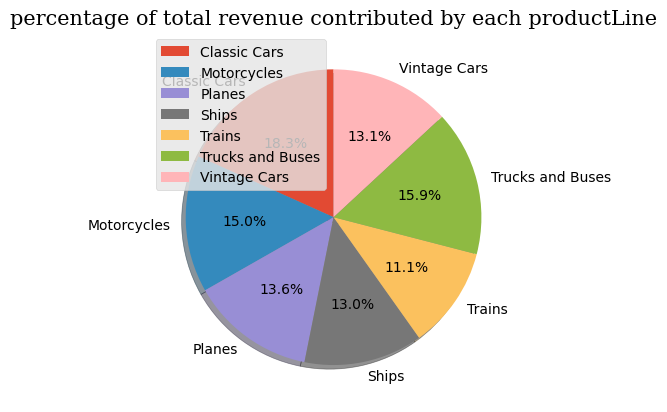

In [48]:
query="""select productLine,round((sum(quantityOrdered * priceEach)/count(*))*100,2) as total_revenue_contributed from orders o join orderdetails od on od.orderNumber=o.orderNumber join products p on p.productCode=od.productCode group by productLine;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["productLine","total_revenue_contributed"])
plt.pie(df["total_revenue_contributed"],
    labels=df["productLine"],
    autopct="%1.1f%%",
    startangle=90,shadow=True)
font={"family":"serif","color":"k","size":15}
plt.title("percentage of total revenue contributed by each productLine",fontdict=font)
plt.legend()
plt.show()

### Find products with low stock (quantityInStock < 1000).

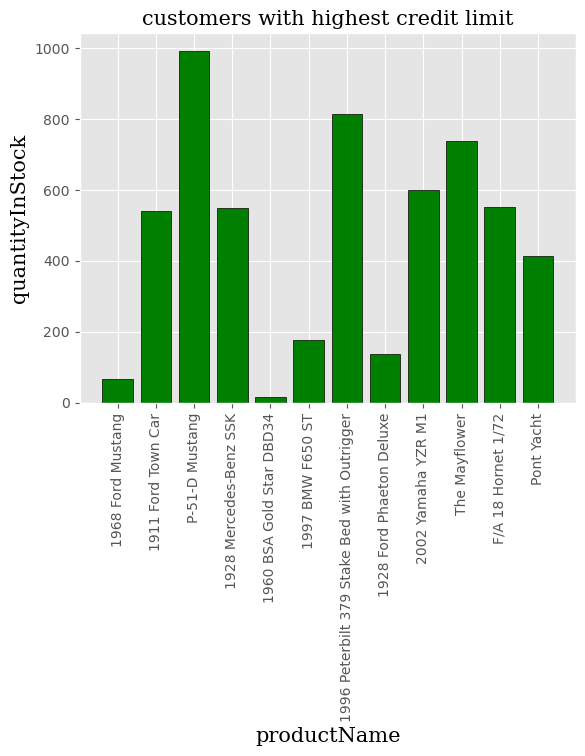

In [49]:
query="""select productName,quantityInStock from products where quantityInStock <1000"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["productName","quantityInStock"])

plt.style.use("ggplot")
plt.bar(df["productName"],df["quantityInStock"],color="g",edgecolor="k")
font={"family":"serif","color":"k","size":15}
plt.title("customers with highest credit limit",fontdict=font)
plt.xlabel("productName",fontdict=font)
plt.ylabel("quantityInStock",fontdict=font)
plt.xticks(rotation=90)
plt.show()

### Calculate the year-over-year growth rate of total sales

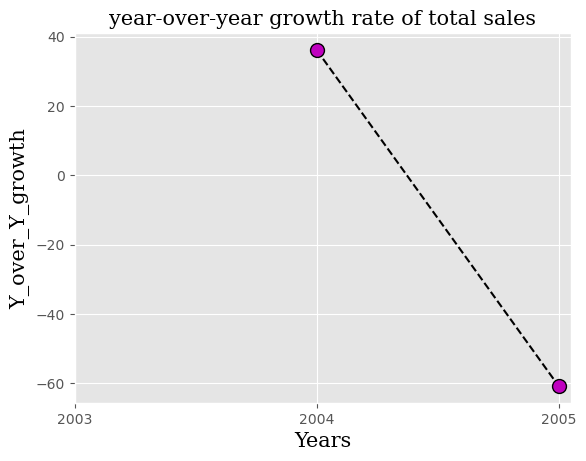

In [57]:
query="""select Years,lag(total_sales) over(order by Years)as Privious_year_sales,round((total_sales-lag(total_sales) over(order by Years))/lag(total_sales) over(order by Years)*100,2) as Y_over_Y_growth 
from (select year(orderDate) as Years,sum(quantityOrdered * priceEach) as total_sales from orders o join orderdetails od on od.orderNumber=o.orderNumber group by year(orderDate))t order by Years;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["Years","Privious_year_sales","Y_over_Y_growth"])

plt.style.use("ggplot")
plt.plot(df["Years"],df["Y_over_Y_growth"],"o--k",mfc="m",mec="k",ms=10)
font={"family":"serif","color":"k","size":15}
plt.title("year-over-year growth rate of total sales",fontdict=font)
plt.xlabel("Years",fontdict=font)
plt.ylabel("Y_over_Y_growth",fontdict=font)
plt.xticks(df["Years"].astype("int"))
plt.show()

### Find payment trend by month.

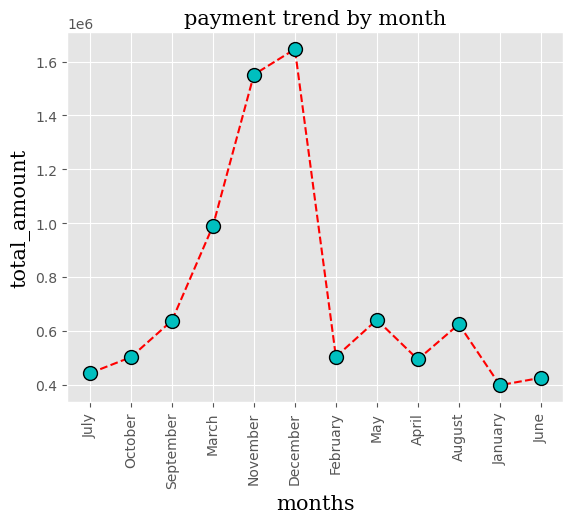

In [60]:
query="""select monthname(paymentDate) as months,round(sum(amount),2)as total_amount from payments group by monthname(paymentDate)"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["months","total_amount"])

plt.style.use("ggplot")
plt.plot(df["months"],df["total_amount"],"o--r",mfc="c",mec="k",ms=10)
font={"family":"serif","color":"k","size":15}
plt.title("payment trend by month",fontdict=font)
plt.xlabel("months",fontdict=font)
plt.ylabel("total_amount",fontdict=font)
plt.xticks(rotation=90)
plt.show()

### Find average payment amount per customer.

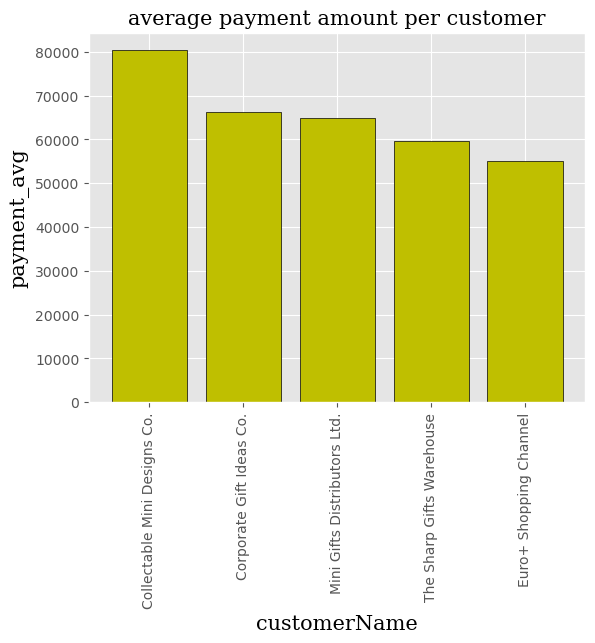

In [62]:
query="""select customerName,round(avg(amount))as payment_avg from customers c left join payments p on p.customerNumber=c.customerNumber group by customerName;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["customerName","payment_avg"]).sort_values("payment_avg",ascending=False).head()

plt.style.use("ggplot")
plt.bar(df["customerName"],df["payment_avg"],color="y",edgecolor="k")
font={"family":"serif","color":"k","size":15}
plt.title("average payment amount per customer",fontdict=font)
plt.xlabel("customerName",fontdict=font)
plt.ylabel("payment_avg",fontdict=font)
plt.xticks(rotation=90)
plt.show()

### Identify the top 3 customers who spent the most money in each year.

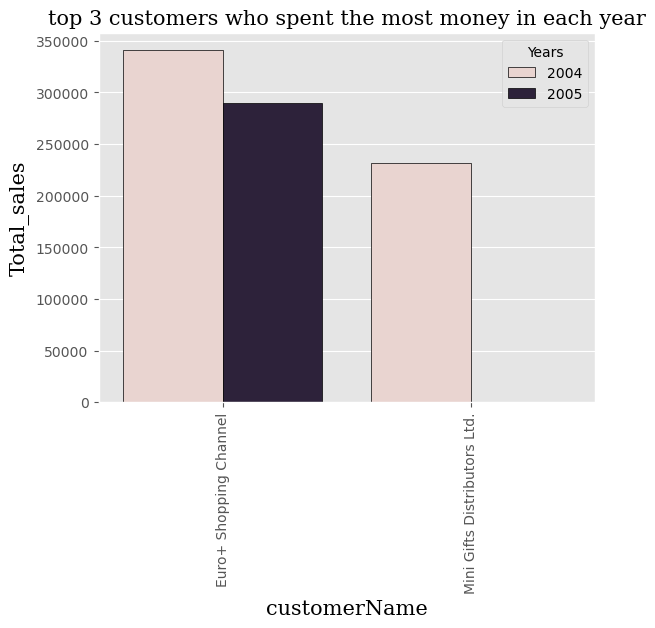

In [69]:
query="""select distinct customerName,year(orderDate) as Years,round(sum(quantityOrdered * priceEach),2) as total_sales from orderdetails od join orders o on o.orderNumber=od.orderNumber join customers c on c.customerNumber=o.customerNumber group by year(orderDate),customerName order by total_sales desc limit 3;
"""
cur.execute(query)
data=cur.fetchall()
df=pd.DataFrame(data,columns=["customerName","Years","Total_sales"]).sort_values("Total_sales",ascending=False)

plt.style.use("ggplot")
sns.barplot(x=df["customerName"],y=df["Total_sales"],hue=df["Years"],edgecolor="k")
font={"family":"serif","color":"k","size":15}
plt.title("top 3 customers who spent the most money in each year",fontdict=font)
plt.xlabel("customerName",fontdict=font)
plt.ylabel("Total_sales",fontdict=font)
plt.xticks(rotation=90)
plt.show()